# X-ray image processing

## Introduction

This notebook demonstrates how to read and process X-ray images with `NumPy`, `imageio`, `Matplotlib` and `SciPy` through loading medical images, focusing on certain parts, and visually comparing them using the `Gaussian`, `Laplacian-Gaussian`, `Sobel`, and `Canny` filters for edge detection.

X-ray image analysis can be part of anyone's `data analysis and machine learning workflow`. In the healthcare industry, medical image processing and analysis is particularly important when images are estimated to account for at least 90% of all medical data.

Radiology images from the [`ChestX-ray8`](https://www.nih.gov/news-events/news-releases/nih-clinical-center-provides-one-largest-publicly-available-chest-x-ray-datasets-scientific-community) dataset provided by the [`National Institutes of Health (NIH)`](https://nih.gov/) is the source of data for this notebook. ChestX-ray8 contains over 100000 de-identified X-ray images in the PNG format from more than 30000 patients. ChestX-ray8’s files can be found on NIH’s public Box repository in the `/images` folder. (For more details, refer to the [`research paper`](https://openaccess.thecvf.com/content_cvpr_2017/papers/Wang_ChestX-ray8_Hospital-Scale_Chest_CVPR_2017_paper.pdf) published at CVPR (a computer vision conference) in 2017.)

## Requirements

* `Python`, `NumPy` arrays, and `Matplotlib`.
* `imageio` for reading and writing image data. The healthcare industry usually works with the `DICOM` format for medical imaging and `imageio` should be well-suited for reading that format. For simplicity, this tutorial will be using simple PNG files.
* `Matplotlib` for data visualization.
* `SciPy` for multi-dimensional image processing via `ndimage`.

#### Examine an X-ray with `imageio`

Let’s begin with a simple example using just one X-ray image from the ChestX-ray8 dataset.

1. Load the image with `imageio`:

In [1]:
!python data/x-ray-data/downloader.py

downloading data/x-ray-data/images_01.tar.gz ...
Uncompressing data/x-ray-data/images_01.tar.gz ...


downloading data/x-ray-data/images_02.tar.gz ...
Uncompressing data/x-ray-data/images_02.tar.gz ...


downloading data/x-ray-data/images_03.tar.gz ...
Uncompressing data/x-ray-data/images_03.tar.gz ...


downloading data/x-ray-data/images_04.tar.gz ...
Uncompressing data/x-ray-data/images_04.tar.gz ...


downloading data/x-ray-data/images_05.tar.gz ...
Uncompressing data/x-ray-data/images_05.tar.gz ...


downloading data/x-ray-data/images_06.tar.gz ...
Uncompressing data/x-ray-data/images_06.tar.gz ...


downloading data/x-ray-data/images_07.tar.gz ...
Uncompressing data/x-ray-data/images_07.tar.gz ...


downloading data/x-ray-data/images_08.tar.gz ...
Uncompressing data/x-ray-data/images_08.tar.gz ...


downloading data/x-ray-data/images_09.tar.gz ...
Uncompressing data/x-ray-data/images_09.tar.gz ...


downloading data/x-ray-data/images_10.tar.gz ...
Uncompressing data/x-ray-data/ima

In [6]:
import os
import imageio
import numpy as np
import matplotlib.pyplot as plt

In [2]:
DIR = "data/images"
xray_image = imageio.v2.imread(os.path.join(DIR, "00000011_001.png"))

2. Check that its shape is 1024x1024 pixels and that the array is made up of 8-bit integers:

In [3]:
print(xray_image.shape)
print(xray_image.dtype)

(1024, 1024)
uint8


3. Use `matplotlib` and display the image in a `grayscale` colormap:

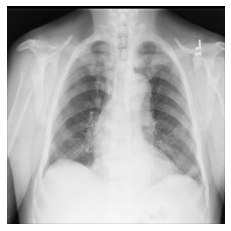

In [4]:
plt.imshow(xray_image, cmap="gray")
plt.axis("off")
plt.show()

#### Combine images into a multidimensional array to demonstrate progression

In the next example, instead of 1 image, 9 X-ray 1024x1024-pixel images will be used from the ChestX-ray8 dataset that have been downloaded and extracted from the dataset files. They are numbered from ...000.png to ...008.png and let’s assume they belong to the same patient.

1. Use `NumPy` to read in each of the X-rays, and create a three-dimensional array where the first dimension corresponds to image number:

In [7]:
num_imgs = 9
combined_xray_images_1 = np.array(
    [imageio.v2.imread(os.path.join(DIR, f"00000011_00{i}.png")) for i in range(num_imgs)]
)

2. Check the shape of the new X-ray image array containing 9 stacked images:

In [8]:
combined_xray_images_1.shape

(9, 1024, 1024)

Note that the shape in the first dimension matches num_imgs, so the combined_xray_images_1 array can be interpreted as a stack of 2D images.

3. Now display the “health progress” by plotting each of frames next to each other using `Matplotlib`:

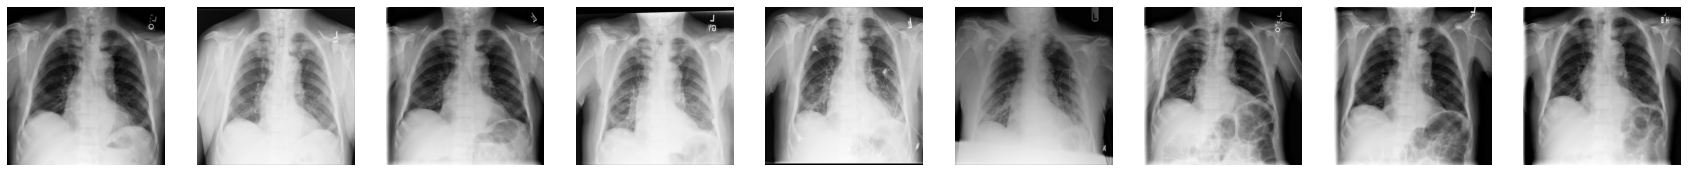

In [11]:
fig, axes = plt.subplots(nrows=1, ncols=num_imgs, figsize=(30, 30))

for img, ax in zip(combined_xray_images_1, axes):
    ax.imshow(img, cmap="gray")
    ax.axis("off")

4. In addition, it can be helpful to show the progress as an animation. Let’s create a GIF file with `imageio.mimwrite()` and display the result in the notebook:

In [12]:
GIF_PATH = os.path.join("data/sample", "xray_image.gif")
imageio.v2.mimwrite(GIF_PATH, combined_xray_images_1, format=".gif", fps=1)